In [1]:
# 图像分析与理解
# 形态学实验 - 灰度图像
# 东南大学，卓旭，212138

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from helper import readBinaryImage, display
from cuMorph import grayscaleComplement, grayscaleErode, grayscaleDilate, grayscaleOpen, grayscaleClose, tophat, same

(256, 256)

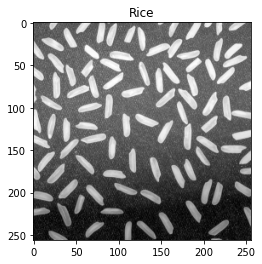

In [4]:
# 1 - 读取rice
Rice = Image.open('./grayscale/rice.png')
Rice = np.array(Rice, dtype=np.int32)
plt.figure(); display(Rice, 'Rice')
Rice.shape

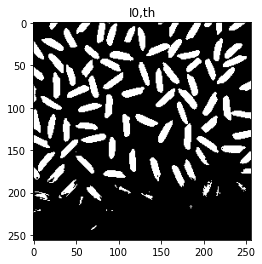

In [5]:
# 2 - 顶帽变换
# a) 直接分割
TH = 150; loc0 = Rice <= TH; loc1 = Rice > TH
I0Th = np.zeros_like(Rice, dtype=bool); I0Th[loc0] = False; I0Th[loc1] = True
plt.figure(); display(I0Th, 'I0,th')

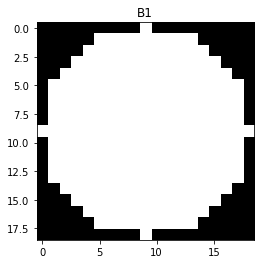

In [6]:
# b)
I0 = Rice
B1 = readBinaryImage('./grayscale/se_1.txt')
plt.figure(); display(B1, 'B1')

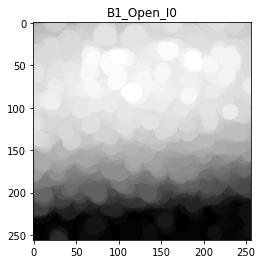

In [7]:
B1_Open_I0 = grayscaleOpen(I0, B1)
plt.figure(); display(B1_Open_I0, 'B1_Open_I0')

min tophatRice:  0


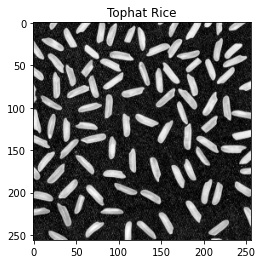

In [8]:
tophatRice = tophat(Rice, B1)
plt.figure(); display(tophatRice, 'Tophat Rice')
print('min tophatRice: ', np.min(tophatRice))

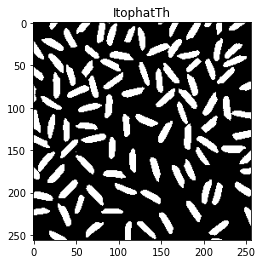

In [9]:
TH = 60; loc0 = tophatRice <= TH; loc1 = tophatRice > TH
ItophatTh = np.zeros_like(tophatRice, dtype=bool); ItophatTh[loc0] = False; ItophatTh[loc1] = True
plt.figure(); display(ItophatTh, 'ItophatTh')

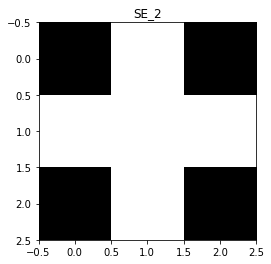

In [10]:
SE_2 = readBinaryImage('./grayscale/se_2.txt')
plt.figure(); display(SE_2, 'SE_2')

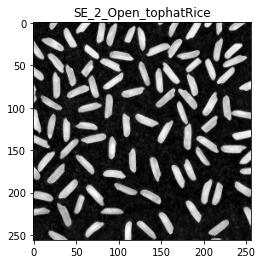

In [11]:
SE_2_Open_tophatRice = grayscaleOpen(tophatRice, SE_2)
plt.figure(); display(SE_2_Open_tophatRice, 'SE_2_Open_tophatRice')

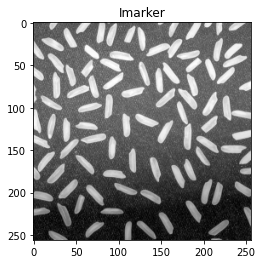

In [12]:
Imarker = I0 - 45
plt.figure(); display(Imarker, 'Imarker')

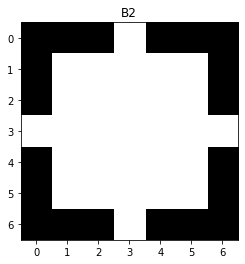

In [13]:
B2 = readBinaryImage('./grayscale/se_3.txt')
plt.figure(); display(B2, 'B2')

In [14]:
def HDome(marker, se, source):
    Ir = np.array(marker)
    Irs = [np.array(Ir)]
    i = 0
    
    while True:
        Ir = np.minimum(grayscaleDilate(Ir, se), source)
        if same(Ir, Irs[-1]):
            break
        Irs.append(np.array(Ir))
        i += 1
    
    return Irs, i

Total iter;  20


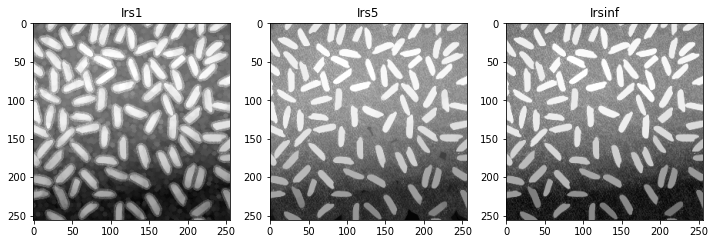

In [16]:
Irs, i = HDome(Imarker, B2, I0)
plt.figure(figsize=(12, 8))
plt.subplot(131); display(Irs[1], 'Irs1')
plt.subplot(132); display(Irs[5], 'Irs5')
plt.subplot(133); display(Irs[-1], 'Irsinf')
print('Total iter; ', i)

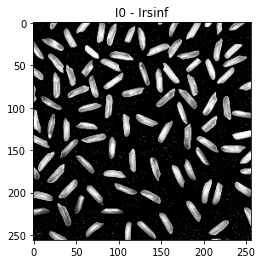

In [17]:
plt.figure(); display(I0 - Irs[-1], 'I0 - Irsinf')